In [1]:
# Importing the dependences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret.regression import *

C:\Users\acer\AppData\Local\Temp\ipykernel_11924\2316340264.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
dataset = pd.read_csv("Advertising.csv")
dataset.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
# Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# statistical Description
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
# Dimension
dataset.shape

(200, 5)

In [6]:
# Checking the null values
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Visualization

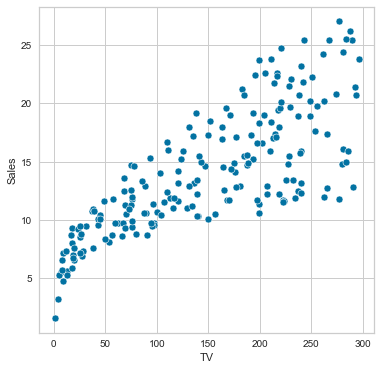

In [8]:
# Plotting TV V/S Sales

plt.figure(figsize=(6,6))
sns.scatterplot(data=dataset, x=dataset['TV'], y=dataset['Sales'])
plt.show()

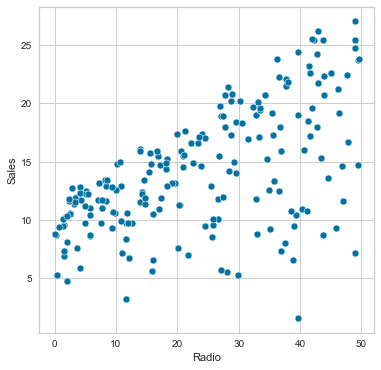

In [9]:
# Plotting Radio V/S Sales

plt.figure(figsize=(6,6))
sns.scatterplot(data=dataset, x=dataset['Radio'], y=dataset['Sales'])
plt.show()

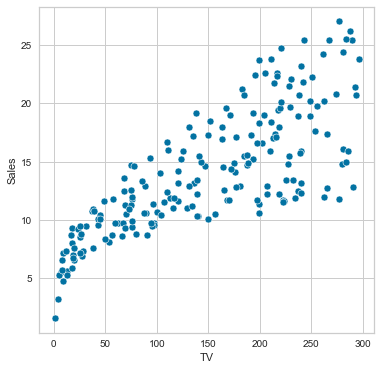

In [10]:
# Plotting Newspaper V/S Sales

plt.figure(figsize=(6,6))
sns.scatterplot(data=dataset, x=dataset['TV'], y=dataset['Sales'])
plt.show()

In [11]:
# Splitting data into train data and test data

x = dataset.drop(['Unnamed: 0','Sales'], axis=1)
y = dataset['Sales']
print("X Dimention: ", x.shape)
print("Y Dimention: ", y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

X Dimention:  (200, 3)
Y Dimention:  (200,)


In [13]:
# Shape of datasets

print("X_Train Shape:", x_train.shape)
print("X_Test Shape:", x_test.shape)
print("Y_Train Shape:", y_train.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (150, 3)
X_Test Shape: (50, 3)
Y_Train Shape: (150,)
Y_Test Shape: (50,)


In [15]:
# Building Model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
# Prediction
pred = model.predict(x_test)
pred

array([12.21848666, 13.94217486, 10.22384321, 18.56724883, 23.3199496 ,
       10.45130197, 21.19152667, 16.53419297, 17.35981255, 21.27782292,
       14.46784207, 19.17437606, 14.94820245, 17.94155545, 13.91392152,
       20.16149704,  6.72900804, 18.26351802, 15.4975032 , 14.91026419,
       13.89164403, 15.08906893, 14.19285216, 21.93429261,  3.67184091,
       15.29427537, 11.71797979,  9.83843453, 17.36968213, 19.60255373,
       21.30538943, 24.88144424, 11.42984831, 10.61775468, 15.01669782,
       10.75777041,  8.78712724, 17.88624596, 14.08669015, 18.2664208 ,
       14.41116298, 21.85906996, 21.83085291,  5.48192281, 11.71647   ,
        6.09389275, 12.24508101, 12.45149923,  8.23662697, 14.10155569])

In [19]:
# Testing the model

print('Mean Absolute Error: ', metrics.mean_absolute_error(pred,y_test))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(pred,y_test)))
print('R-Squared: ', metrics.r2_score(pred,y_test))

Mean Absolute Error:  1.3589661756175426
Root Mean Squared Error:  1.7670302705342993
R-Squared:  0.867331723648149


In [20]:
# Saving the model

filename = "Linear_Regression.pkl"
pickle.dump(model, open(filename, 'wb'))
print("Saved the Model")

Saved the Model


**The Accuracy of Linear Regression Model is 86%**

### Comparing Regression Models

In [21]:
s = setup(data = dataset, target = 'Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 5)"
4,Transformed data shape,"(200, 5)"
5,Transformed train set shape,"(140, 5)"
6,Transformed test set shape,"(60, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4870,0.4736,0.6572,0.9818,0.0699,0.0568,0.0920
gbr,Gradient Boosting Regressor,0.6630,0.7866,0.8574,0.9682,0.0850,0.0716,0.0640
rf,Random Forest Regressor,0.7133,0.8401,0.8900,0.9677,0.0848,0.0737,0.1030
xgboost,Extreme Gradient Boosting,0.7371,1.0121,0.9810,0.9574,0.0935,0.0777,0.3060
ada,AdaBoost Regressor,0.8880,1.2378,1.0774,0.9505,0.0997,0.0914,0.0720
dt,Decision Tree Regressor,0.9236,1.4702,1.1938,0.9339,0.1109,0.0898,0.0590
lightgbm,Light Gradient Boosting Machine,1.0096,1.9894,1.3678,0.9170,0.1453,0.1206,0.2570
lasso,Lasso Regression,1.3872,3.3382,1.7591,0.8656,0.1724,0.1614,0.0330
en,Elastic Net,1.3877,3.3523,1.7612,0.8652,0.1736,0.1622,0.0220
lar,Least Angle Regression,1.3886,3.3712,1.7643,0.8646,0.1755,0.1634,0.0450


ExtraTreesRegressor(n_jobs=-1, random_state=123)

**Finalizing the best Model**

In [23]:
etr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4179,0.3977,0.6307,0.9820,0.0424,0.0347
1,0.7176,1.4009,1.1836,0.9549,0.2556,0.2236
2,0.5294,0.5571,0.7464,0.9822,0.0436,0.0384
3,0.3916,0.2425,0.4925,0.9795,0.0365,0.0306
4,0.3891,0.2269,0.4764,0.9817,0.0350,0.0297
5,0.4183,0.2326,0.4823,0.9899,0.0384,0.0361
6,0.5249,0.3842,0.6199,0.9884,0.0540,0.0458
7,0.3770,0.2750,0.5244,0.9858,0.0702,0.0441
8,0.4856,0.3812,0.6174,0.9886,0.0759,0.0451


In [24]:
etr = finalize_model(etr)
etr

Pipeline(memory=FastMemory(location=C:\Users\acer\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'TV', 'Radio',
                                             'Newspaper'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [25]:
preds = predict_model(etr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


***Accuracy of the Model is 100%***